# Walmart's Weekly Sales Analysis and Forecasting

This project focuses on analyzing and forecasting Walmart's weekly sales data to provide valuable insights for strategic planning and performance optimization.


## Aim
The aim of this project is to:
- Analyze historical sales data to identify trends and performance patterns across Walmart's stores.
- Develop predictive models to forecast future weekly sales.
- Provide actionable insights to assist in strategic decision-making, resource management, and growth planning for Walmart.


## Introduction
Sales analysis and forecasting are vital for businesses to understand past performance and make informed decisions for future growth. By analyzing historical sales data, companies can identify trends, drivers of sales, and areas needing improvement. Forecasting extends these insights by projecting future sales, allowing for better budgeting, resource allocation, and goal setting.

For Walmart, analyzing weekly sales data across its stores will help identify trends and variations in sales performance. This analysis can inform strategic decisions, optimize resource use, and reveal potential growth opportunities. Forecasting future sales will enable Walmart to anticipate changes, align financial plans, and allocate resources effectively, enhancing both financial and operational planning.


<!-- 
## Explanation of Analysis Steps
1. **Data Wrangling**: Preparing the dataset by cleaning and transforming the data to ensure accuracy and consistency for analysis.
2. **Exploratory Data Analysis (EDA)**: Investigating the data to find patterns, trends, and outliers that can inform the modeling phase.
3. **Model Selection and Evaluation**: Choosing and training predictive models (e.g., time-series models, regression models) and evaluating their performance based on relevant metrics.
4. **Forecasting**: Using the best-performing model to forecast future weekly sales.
5. **Conclusion**: Summarizing findings and providing actionable insights based on the analysis and forecast.
6. **References**: Listing sources that support the analysis and contextual understanding. -->





# 1. Dataset Description
The file **Walmart.csv** was obtained from the Kaggle website. It consists of Walmart's weekly sales data spanning from **2010-02-05 to 2012-11-01**. The file has the following columns:

- **Store**: The store number
- **Date**: The week of sales
- **Weekly_Sales**: Sales for the given store
- **Holiday_Flag**: Indicates whether the week is a special holiday week
  - `1` – Holiday week
  - `0` – Non-holiday week
- **Temperature**: Temperature on the day of sale
- **Fuel_Price**: Cost of fuel in the region
- **CPI**: Prevailing consumer price index
- **Unemployment**: Prevailing unemployment rate in percentage

### Holiday Events include:
- **Super Bowl**: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13
- **Labour Day**: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13
- **Thanksgiving**: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13
- **Christmas**: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13



In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [45]:
sales = pd.read_csv('./Walmart.csv')
sales.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


# 2. Data Wrangling

Data wrangling is the process of transforming raw data into a format that's ready for analysis. In this section, we will identify and address any errors, inconsistencies, missing values, or duplicate entries in the dataset to ensure that it is accurate, consistent, and complete, making it suitable for analysis.

---

## Objectives of Data Wrangling:
We will focus on the following problems to ensure the quality and reliability of the dataset:

1. **Missing values in the dataset**
2. **Duplicate entries in the dataset**
3. **Outliers in the dataset that may impact the analysis**
4. **Feature engineering for better analysis**

In [46]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [47]:
sales['Date'] = pd.to_datetime(sales['Date'], dayfirst=True)
sales.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106


In [48]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


In [49]:
sales.columns = [col.lower() for col in sales.columns ]

In [50]:
sales.columns 

Index(['store', 'date', 'weekly_sales', 'holiday_flag', 'temperature',
       'fuel_price', 'cpi', 'unemployment'],
      dtype='object')

In [51]:
sales[sales.duplicated()]

,store,date,weekly_sales,holiday_flag,temperature,fuel_price,cpi,unemployment


In [52]:
sales.isnull().sum()

store           0
date            0
weekly_sales    0
holiday_flag    0
temperature     0
fuel_price      0
cpi             0
unemployment    0
dtype: int64

In [53]:
# Function to find and count outliers in a DataFrame
def find_outliers(df):
    outlier_counts = {}
    for column in df.select_dtypes(include=['float64', 'int64']).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Find outliers
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        count = outliers.shape[0]
        
        if count > 0:
            outlier_counts[column] = count
    
    return outlier_counts

# Using the function on your DataFrame
outliers = find_outliers(sales)
print("Outlier counts for each column:")
print(outliers)


Outlier counts for each column:
{'weekly_sales': 34, 'holiday_flag': 450, 'temperature': 3, 'unemployment': 481}


In [54]:
def find_outlier_rows(df, col, level='both'):
    # compute the interquartile range
    iqr = df[col].quantile(0.75) - df[col].quantile(0.25)

    # compute the upper and lower bounds for identifying outliers
    lower_bound = df[col].quantile(0.25) - 1.5 * iqr
    upper_bound = df[col].quantile(0.75) + 1.5 * iqr

    # filter the rows based on the level of outliers to return
    if level == 'lower':
        return df[df[col] < lower_bound]
    elif level == 'upper':
        return df[df[col] > upper_bound]
    else:
        return df[(df[col] > upper_bound) | (df[col] < lower_bound)]

In [55]:
sales['unemployment'].describe()

count    6435.000000
mean        7.999151
std         1.875885
min         3.879000
25%         6.891000
50%         7.874000
75%         8.622000
max        14.313000
Name: unemployment, dtype: float64

In [56]:
find_outlier_rows(sales, 'unemployment')['unemployment'].describe()

count    481.000000
mean      11.447480
std        3.891387
min        3.879000
25%       11.627000
50%       13.503000
75%       14.021000
max       14.313000
Name: unemployment, dtype: float64

In [57]:
sales['holiday_flag'].describe()

count    6435.000000
mean        0.069930
std         0.255049
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: holiday_flag, dtype: float64

In [58]:
find_outlier_rows(sales, 'holiday_flag')['holiday_flag'].describe()

count    450.0
mean       1.0
std        0.0
min        1.0
25%        1.0
50%        1.0
75%        1.0
max        1.0
Name: holiday_flag, dtype: float64

In [59]:
sales['employment'] = 100 - sales['unemployment']

# split the date column
sales['year']= sales['date'].dt.year
sales['month'] = sales['date'].dt.month
sales['day'] = sales['date'].dt.day
sales.head()

,store,date,weekly_sales,holiday_flag,temperature,fuel_price,cpi,unemployment,employment,year,month,day
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,91.894,2010,2,5
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,91.894,2010,2,12
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,91.894,2010,2,19
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,91.894,2010,2,26
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,91.894,2010,3,5


# 3. Exploratory Data Analysis

Now that we have finished the data wrangling phase, we will explore the dataset to extract useful information. Exploratory Data Analysis (EDA) helps in understanding the underlying patterns, trends, and relationships within the data, which can guide our analysis and model selection.

### Key Steps in EDA
- **Descriptive Statistics**: Summarize the dataset using measures such as mean, median, mode, standard deviation, and percentiles.
- **Visualizations**: Create visual representations such as histograms, box plots, and scatter plots to better understand the data.
- **Correlation Analysis**: Assess the relationships between numerical variables using correlation coefficients and heatmaps.
- **Time Series Analysis**: Analyze trends over time, particularly focusing on weekly sales.

In [60]:
sales.describe()

,store,date,weekly_sales,holiday_flag,temperature,fuel_price,cpi,unemployment,employment,year,month,day
count,6435.000000,6435,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,2011-06-17 00:00:00,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151,92.000849,2010.965035,6.447552,15.678322
min,1.000000,2010-02-05 00:00:00,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000,85.687000,2010.000000,1.000000,1.000000
25%,12.000000,2010-10-08 00:00:00,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000,91.378000,2010.000000,4.000000,8.000000
50%,23.000000,2011-06-17 00:00:00,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000,92.126000,2011.000000,6.000000,16.000000
75%,34.000000,2012-02-24 00:00:00,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000,93.109000,2012.000000,9.000000,23.000000
max,45.000000,2012-10-26 00:00:00,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000,96.121000,2012.000000,12.000000,31.000000
std,12.988182,NaN,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885,1.875885,0.797019,3.238308,8.755780


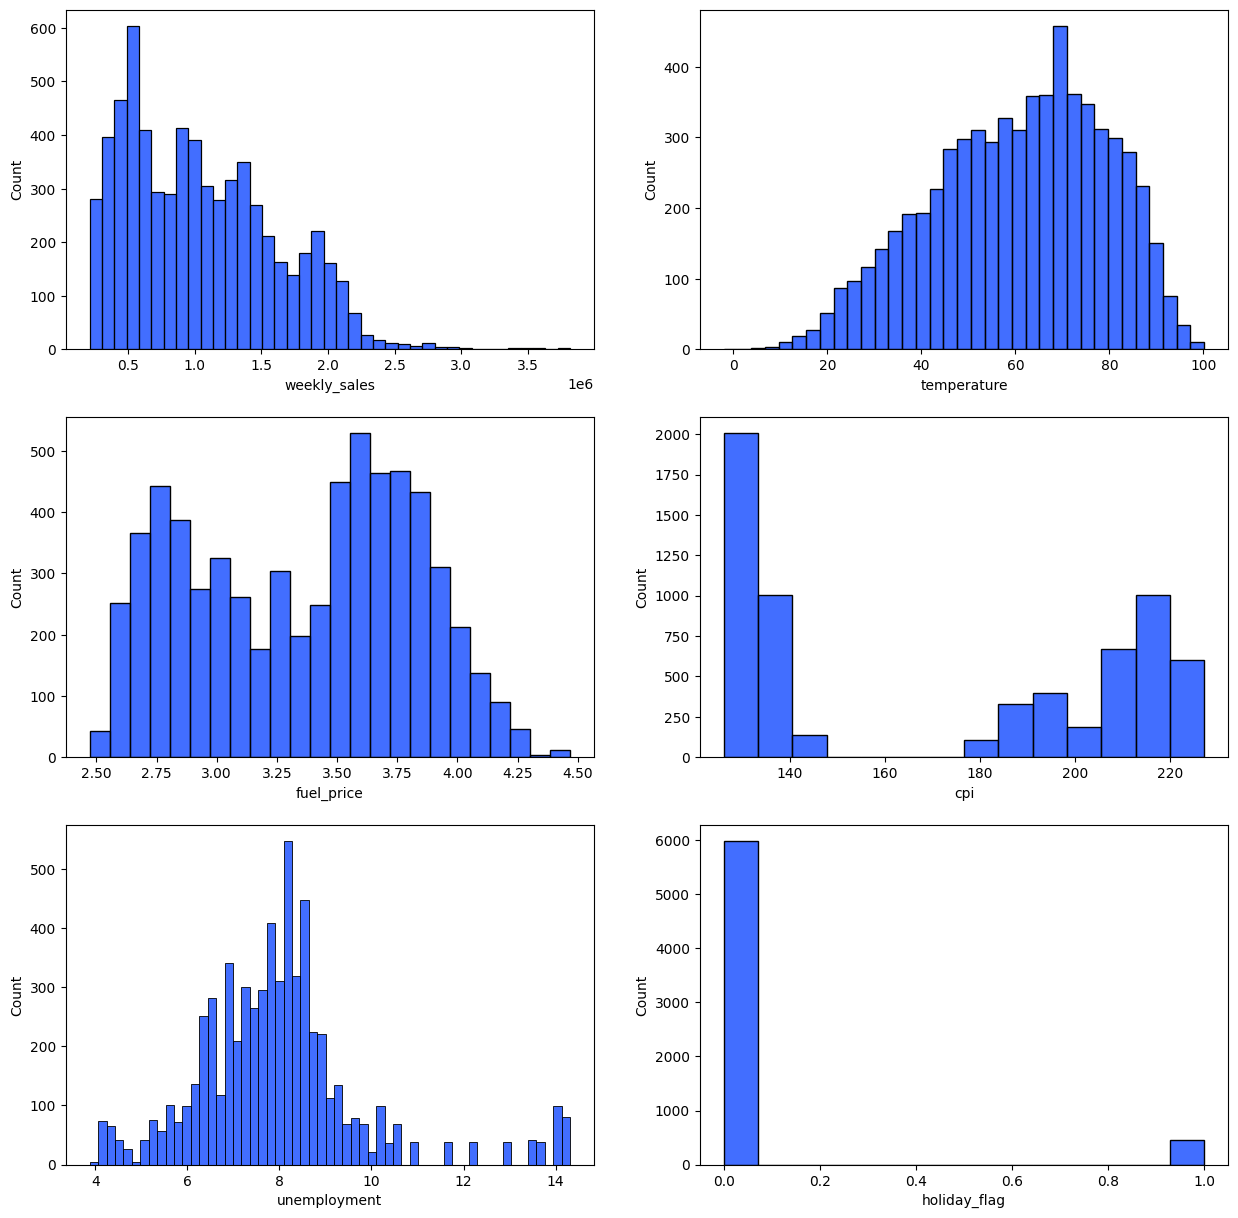

In [61]:
import seaborn as sns

#histogram of weekly sales, temperature, fuel price, and CPI, and unemployment
fig, ax = plt.subplots(3, 2, figsize=(15, 15))
sns.histplot(x=sales.weekly_sales, ax=ax[0,0])
sns.histplot(x=sales.temperature, ax=ax[0,1])
sns.histplot(x=sales.fuel_price, ax=ax[1,0])
sns.histplot(x=sales.cpi, ax=ax[1,1])
sns.histplot(x=sales.unemployment, ax=ax[2,0])
sns.histplot(x=sales.holiday_flag, ax=ax[2,1])

plt.show()

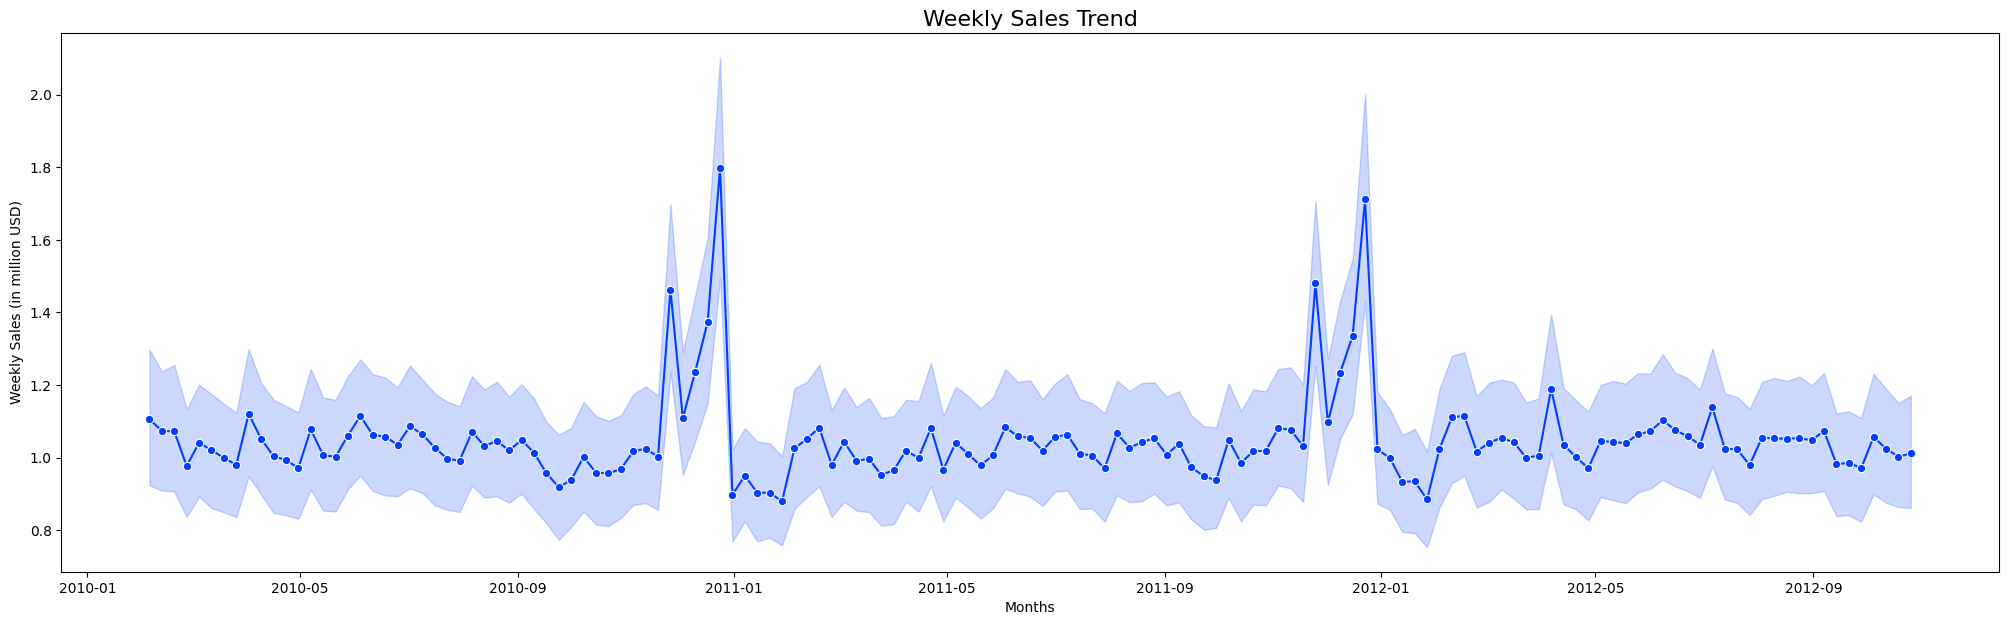

In [62]:
fig, ax = plt.subplots(figsize=(25, 7))
sns.lineplot(x=sales.date, y=(sales.weekly_sales/1e6),  marker='o')
plt.xlabel('Months')
plt.ylabel('Weekly Sales (in million USD)')
plt.title('Weekly Sales Trend',fontdict={'fontsize': 16}, pad=5)
plt.show()

The line plot reveals that weekly sales at Walmart generally remain stable throughout the year, with the exception of November and December, which experience a significant increase in sales. This trend can be due to the holiday season, when consumers typically make more purchases and retailers offer promotions and discounts.

Walmart could consider offering seasonal discounts and promotions during this time. By doing so, they can encourage more customers to make purchases and potentially drive up sales.

#### Now Seasonal Trend in Weekly Sales

In [63]:
pivot_table = sales.pivot_table(index='month', columns='year', values='weekly_sales', aggfunc='mean')
pivot_table

year,2010,2011,2012
month,,,
1,NaN,9.094665e+05,9.383026e+05
2,1.057405e+06,1.035174e+06,1.067020e+06
3,1.010666e+06,9.964247e+05,1.028932e+06
4,1.028499e+06,1.006784e+06,1.049561e+06
5,1.037283e+06,1.009156e+06,1.048703e+06
6,1.068034e+06,1.054297e+06,1.069379e+06
7,1.033689e+06,1.021828e+06,1.041719e+06
8,1.042445e+06,1.047774e+06,1.052670e+06
9,9.848216e+05,9.815455e+05,1.003586e+06


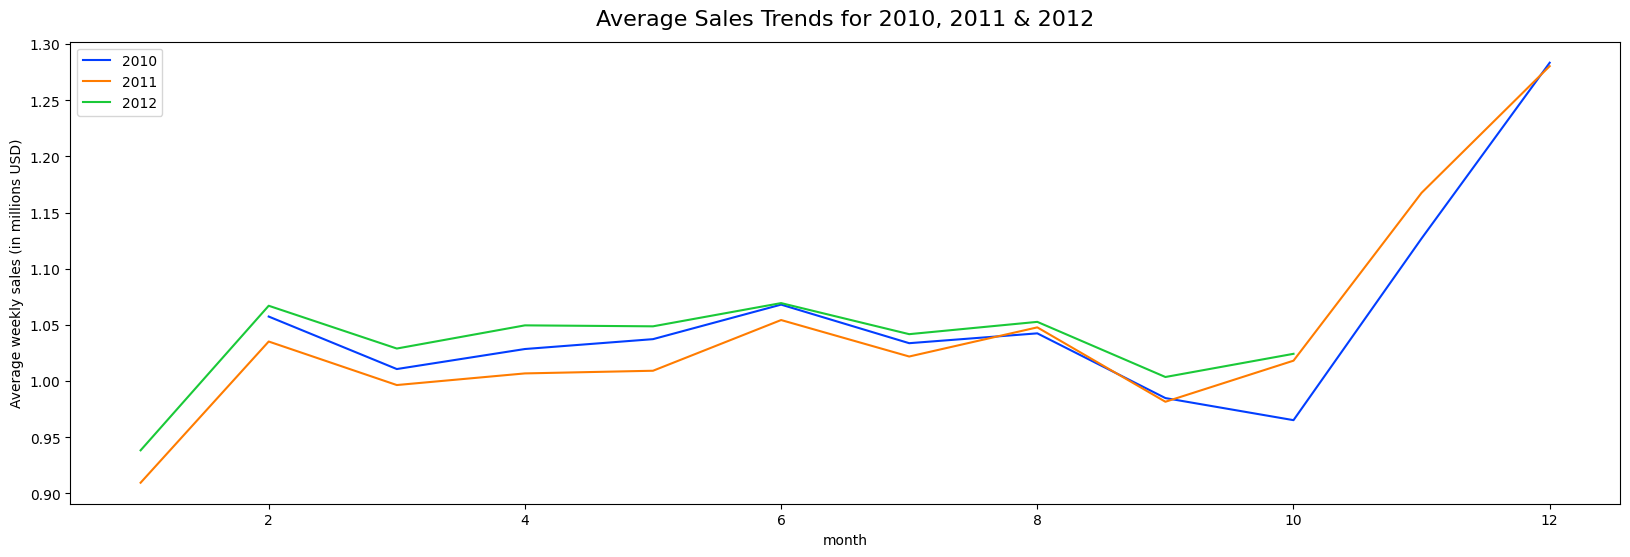

In [64]:
# plot the average sales
fig, ax = plt.subplots(figsize=(20, 6))
sns.lineplot(x=pivot_table.index, y=pivot_table[2010]/1e6, ax=ax, label='2010')
sns.lineplot( x=pivot_table.index, y=pivot_table[2011]/1e6, ax=ax, label='2011')
sns.lineplot( x=pivot_table.index, y=pivot_table[2012]/1e6, ax=ax, label='2012')
plt.ylabel('Average weekly sales (in millions USD)')
plt.title('Average Sales Trends for 2010, 2011 & 2012', fontdict ={'fontsize':16,                                                
                                                                   'horizontalalignment': 'center'},
                                                                   pad=12)
# Add a legend
plt.legend()
plt.show()

We can observe that the line charts for the three years for the month of January to October simultaneously follow a sawtooth shape with big rises experienced in November and December due to holidays. This indicates seasonality trends as months do have consistencies in bigger or smaller sales for the three years. We can also observe that although 2011 performed worst than 2010 in terms of average sales for Walmart, the trend was reversed for the year 2012 which performed better than 2010. 

In [65]:
def plot_top_and_bottom_stores(df, col):
    df = df.groupby(col).mean().sort_values(by='weekly_sales', ascending=False)
    
    # Select the top 5 and bottom 5 products
    top_stores = df.head(5)
    bottom_stores = df.tail(5)
    
    # Set the color palette
    sns.set_palette("bright")

    fig, ax = plt.subplots(figsize=(10, 6))
    sns.barplot(x=top_stores.index, y=top_stores['weekly_sales']/1e6, order=top_stores.index)
    plt.title('Top 5 Stores by Average Sales')
    plt.ylabel('Average weekly sales (millions USD)')
    plt.show()
    

    fig, ax = plt.subplots(figsize=(10, 6))
    sns.barplot(x=bottom_stores.index, y=bottom_stores['weekly_sales']/1e6, order=bottom_stores.index)
    plt.title('Bottom 5 Stores by Average Sales')
    plt.ylabel('Average weekly sales (millions USD)')
    plt.show()

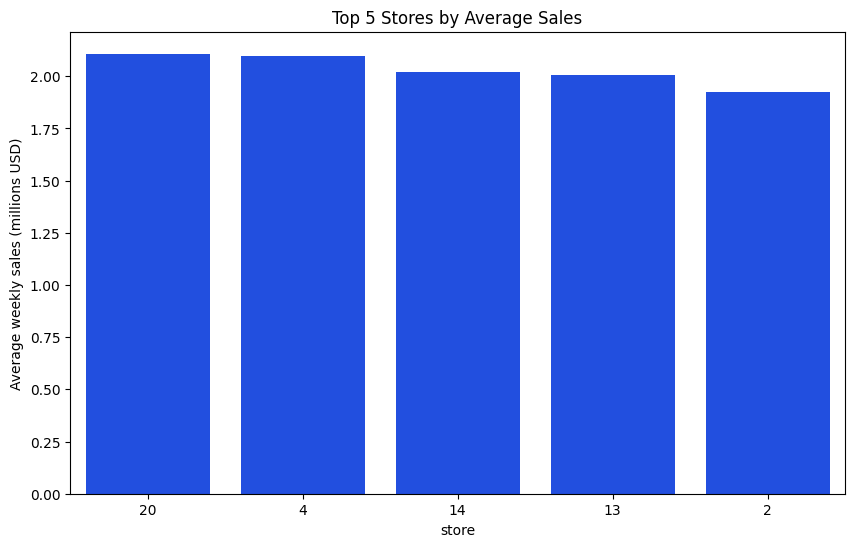

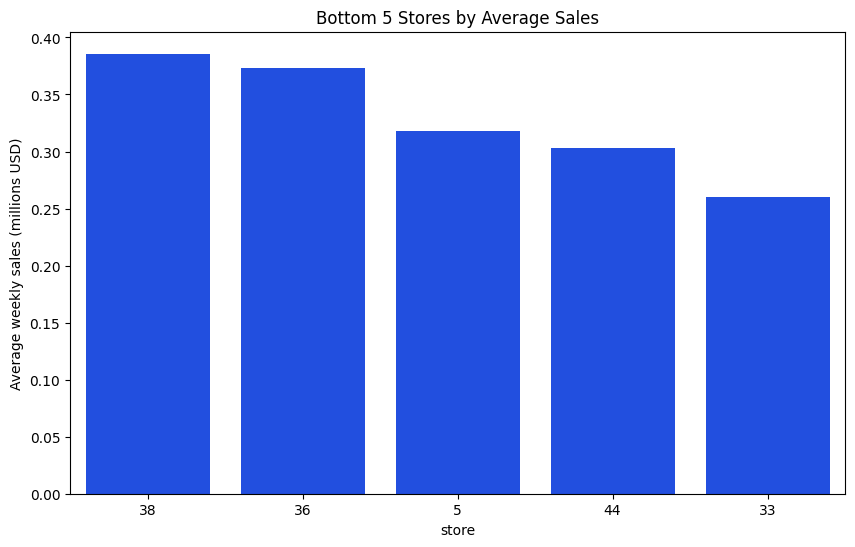

In [66]:
plot_top_and_bottom_stores(sales, 'store')

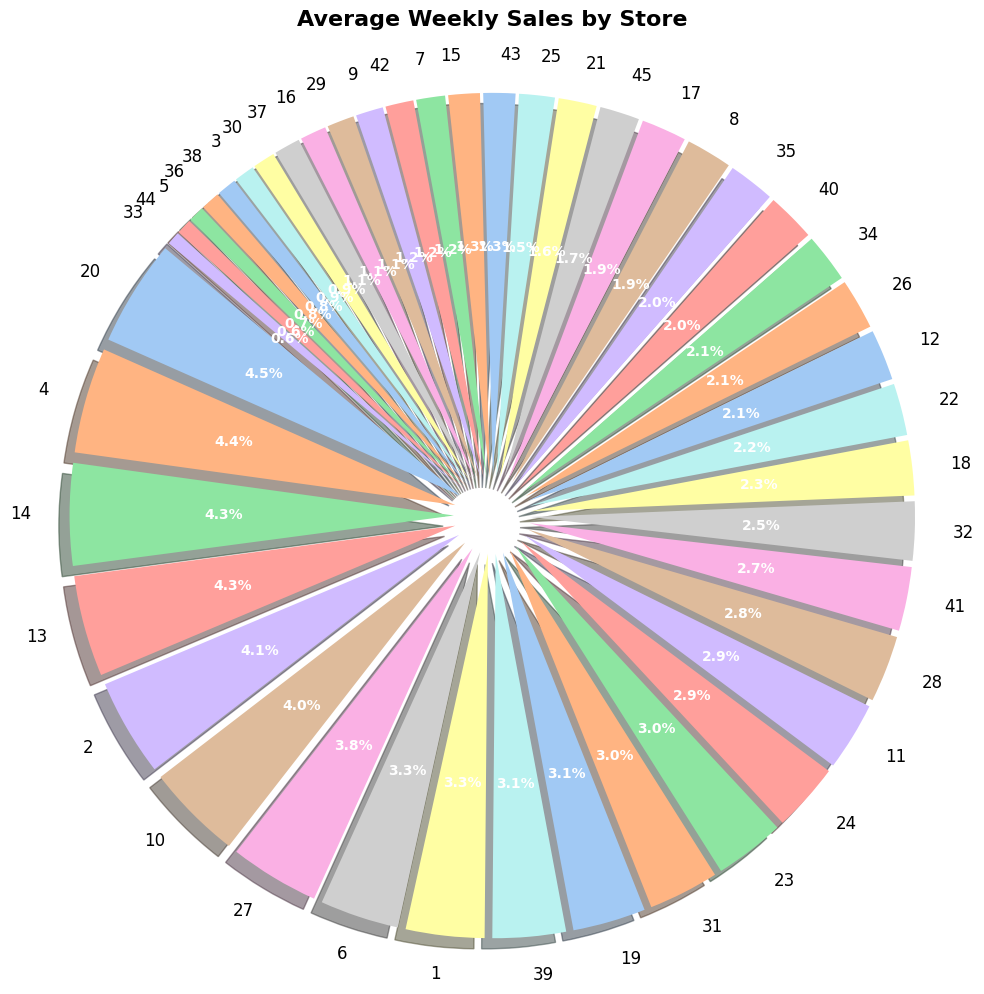

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_all_stores_sales(df, col):
    """
    Plot the average weekly sales for all stores as a pie chart.
    
    Parameters:
    df (pandas DataFrame): The dataframe containing the sales data.
    col (str): The name of the column to group the data by.
    
    Returns:
    None
    """
    # Group the data by the specified column and calculate average weekly sales
    store_sales = df.groupby(col)['weekly_sales'].mean().sort_values(ascending=False)

    # Set the color palette
    colors = sns.color_palette("pastel", len(store_sales))

    # Create a pie chart of average sales for all stores
    plt.figure(figsize=(12, 12))
    wedges, texts, autotexts = plt.pie(
        store_sales,
        labels=store_sales.index,
        autopct='%1.1f%%',
        startangle=140,
        colors=colors,
        shadow=True,
        explode=[0.1] * len(store_sales)  # Explode all slices for emphasis
    )

    # Beautify the plot
    plt.setp(autotexts, size=10, weight="bold", color="white")  # Style for percentage texts
    plt.setp(texts, size=12)  # Style for store labels
    plt.title('Average Weekly Sales by Store', fontsize=16, weight='bold', pad=20)
    plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular.
    
    # Show the plot
    plt.show()

# Example usage (assuming 'store' is the column to group by):
plot_all_stores_sales(sales, 'store')

In [68]:
non_holiday_sales = sales[sales['holiday_flag'] == 0]
holiday_sales = sales[sales['holiday_flag'] == 1]

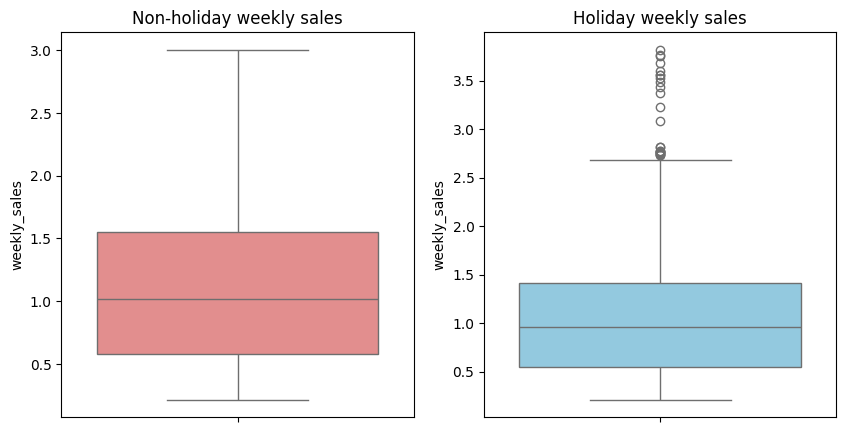

In [69]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
sns.boxplot(data=holiday_sales['weekly_sales']/1e6, ax=ax[0], color='lightcoral')
sns.boxplot(data=non_holiday_sales['weekly_sales']/1e6, ax=ax[1], color='skyblue')
ax[0].set_title('Non-holiday weekly sales')
ax[1].set_title('Holiday weekly sales')

sns.set_palette("bright")
plt.show()

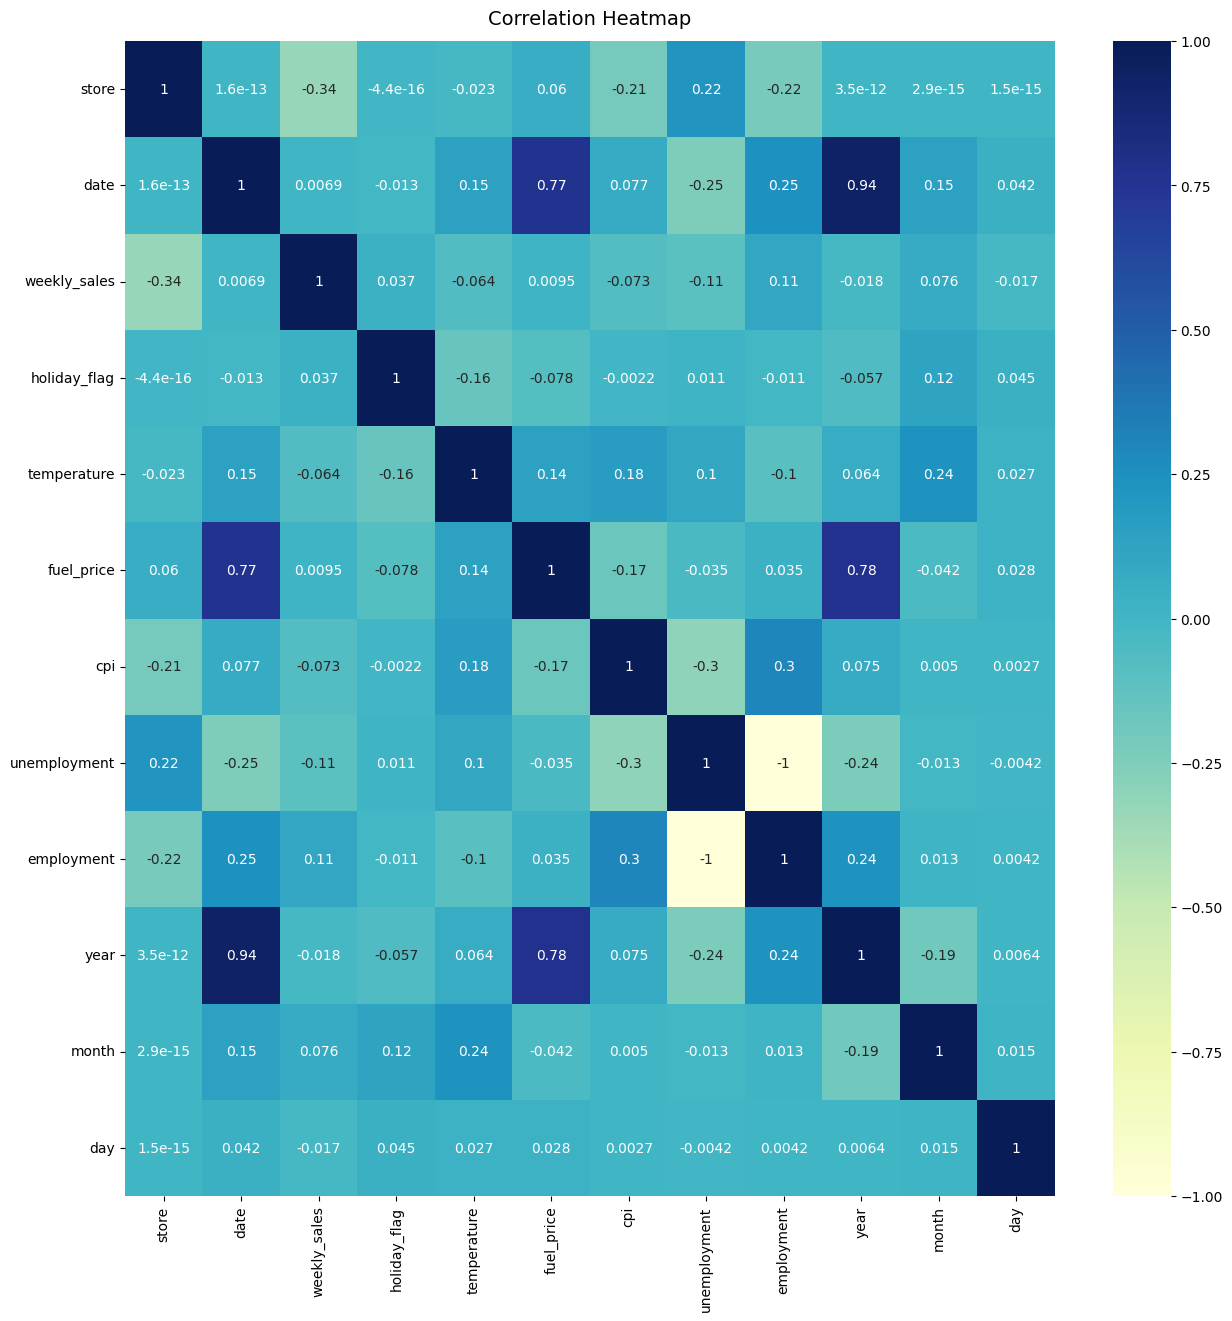

In [70]:
fig, ax = plt.subplots(figsize=(15,15));
heatmap = sns.heatmap(sales.corr(), vmin=-1, vmax=1, annot=True, cmap ="YlGnBu")
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12);

Of all the weaker correlations, employment is the strongest with 0.11 correlation coefficient.

# 4 Model Selection and Evaluation

We'll test different regression models on our data using Root Mean Squared Error (RMSE) to evaluate performance. RMSE measures how close predicted values are to actual values, with lower scores indicating better accuracy.
<br>
### Models to test:<br>

- Linear Regression
- Decision Tree Regressor
- Random Forest Regressor
- K Nearest Neighbour<br><br>

Each model will be trained on the training data, and RMSE will be calculated on the test set. We'll use a copy of the preprocessed data to preserve the original dataset for easy troubleshooting.

In [71]:
sales_copy = sales.copy()

sales_copy.drop(['date', 'unemployment'], axis=1, inplace=True)
sales_copy.head()

X = sales_copy.drop('weekly_sales', axis=1)
y = sales_copy['weekly_sales']

In [72]:
from sklearn.preprocessing import StandardScaler # same range 

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [73]:
from sklearn.model_selection import train_test_split
X_train, X_valid, Y_train, Y_valid = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [74]:
np.random.seed(42)
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score

def rmsle(y_test, y_preds):
    return np.sqrt(mean_squared_log_error(y_test, y_preds))

def show_scores(model):
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_valid)
    scores = {"Training MAE" : mean_absolute_error(Y_train,train_preds),
              "valid MAE" : mean_absolute_error(Y_valid, val_preds),
              "Training RMSLE" : rmsle(Y_train,train_preds),
              "valid RMSLE" : rmsle(Y_valid, val_preds),
              "Training R^2": r2_score(Y_train,train_preds),
              "valid R^2" : r2_score(Y_valid, val_preds)}
    
    return scores

## Checking which model is better

In [75]:
def evaluate_regressors_rmses(regressors, regressor_names, X_train, Y_train, X_valid, Y_valid):
    rmses = [evaluate_model(regressor, X_train, Y_train, X_valid, Y_valid) for regressor in regressors]
    
    # create a dictionary mapping the names of the regressors to their RMSE
    regressor_rmses = dict(zip(regressor_names, rmses))
    
    # convert the dictionary to a pandas dataframe
    df = pd.DataFrame.from_dict(regressor_rmses, orient='index')
    
    # reset the index of the dataframe
    df = df.reset_index()
    df.columns = ['regressor_name', 'rmse']
    return df.sort_values('rmse', ignore_index=True)


In [76]:
def evaluate_model(model, X_train, Y_train, X_valid, Y_valid):
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_valid)
    mse = mean_squared_error(Y_valid, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(Y_valid, y_pred)
    print("r2 score of",model,":",r2)
    return rmse

In [77]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

# initialize the regressors
linear_regressor = LinearRegression()
decision_tree_regressor = DecisionTreeRegressor()
random_forest_regressor = RandomForestRegressor()
knn_regressor = KNeighborsRegressor(n_neighbors=5, weights='uniform')

In [78]:
from sklearn.metrics import mean_squared_error

regressors = [linear_regressor, decision_tree_regressor, random_forest_regressor, knn_regressor]

# collect the names of regressors
regressor_names = ["Linear Regression", "Decision Tree Regression", "Random Forest Regression", "K-Nearest Neighbour Regression"]


In [79]:
print('\033[1m Table of regressors and their RMSEs')
evaluate_regressors_rmses(regressors, regressor_names, X_train, Y_train, X_valid, Y_valid)

 Table of regressors and their RMSEs
r2 score of LinearRegression() : 0.155485902615203
r2 score of DecisionTreeRegressor() : 0.9417249330302968
r2 score of RandomForestRegressor() : 0.9588763849687204
r2 score of KNeighborsRegressor() : 0.34225146057164313


,regressor_name,rmse
0,Random Forest Regression,115100.652894
1,Decision Tree Regression,137016.710034
2,K-Nearest Neighbour Regression,460322.380901
3,Linear Regression,521597.614421


# Random Forest

In [80]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_jobs=-1, random_state=42)

In [81]:
model.fit(X_train, Y_train)

RandomForestRegressor(n_jobs=-1, random_state=42)

In [82]:
show_scores(model)

{'Training MAE': 21379.888311752144,
 'valid MAE': 57999.79149269621,
 'Training RMSLE': 0.03224752928061323,
 'valid RMSLE': 0.08311739844958757,
 'Training R^2': 0.9945204800175891,
 'valid R^2': 0.9589956486389212}

In [83]:
from sklearn.model_selection import RandomizedSearchCV

# Different RandomForestRegressor hyperparameters
rf_grid = {"n_estimators": np.arange(10,100,10),
            "max_depth": [None, 3, 5, 10],
            "min_samples_split": np.arange(2,20,2),
            "min_samples_leaf": np.arange(1,20,2),
            "max_features": [0.5, 1, "sqrt", "log2"],
            "max_samples": [4000]}

# Instantiate RandomizedSearchCv model
rs_model = RandomizedSearchCV(model, 
                                param_distributions=rf_grid,
                                n_iter=5,
                                cv=5, 
                                verbose=True)
# fit the model
#simple hyperparameter tune
rs_model.fit(X_train, Y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=5,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'log2'],
                                        'max_samples': [4000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [84]:
show_scores(rs_model)

{'Training MAE': 73268.77666250999,
 'valid MAE': 89691.62843543227,
 'Training RMSLE': 0.11624042375164056,
 'valid RMSLE': 0.13931775686202794,
 'Training R^2': 0.9500874695595385,
 'valid R^2': 0.9286830555484739}